## CHOCOLATE SALES ANALYSIS

### Importing Libraries

In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "mysql",
    database = "Chocolate_Sales"
)
mycursor = db.cursor()
print(db)

In [8]:
mycursor.execute("SELECT DATABASE()")
mycursor.fetchone()

('chocolate_sales',)

In [11]:
mycursor.execute("SHOW TABLES")
mycursor.fetchall()

[('choco sales',)]

In [13]:
database="Chocolate_Sales"

In [15]:
pd.read_sql("SELECT DATABASE()", db)

,DATABASE()
0,chocolate_sales


In [17]:
df = pd.read_sql("SELECT * FROM `choco sales`", db)
df.head()

,SalesPerson,Country,PRODUCT_NAME,Date,Total_Sales,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


### Dataset Information

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalesPerson    1094 non-null   object 
 1   Country        1094 non-null   object 
 2   PRODUCT_NAME   1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Total_Sales    1094 non-null   float64
 5   Boxes Shipped  1094 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 51.4+ KB


,Total_Sales,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [21]:
df['Total_Sales'] = (
    df['Total_Sales']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df = df.dropna(subset=['Total_Sales', 'Boxes Shipped'])

In [25]:
df[['Total_Sales', 'Boxes Shipped']].describe()

,Total_Sales,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


### Data vizualisation and storytelling With Charts

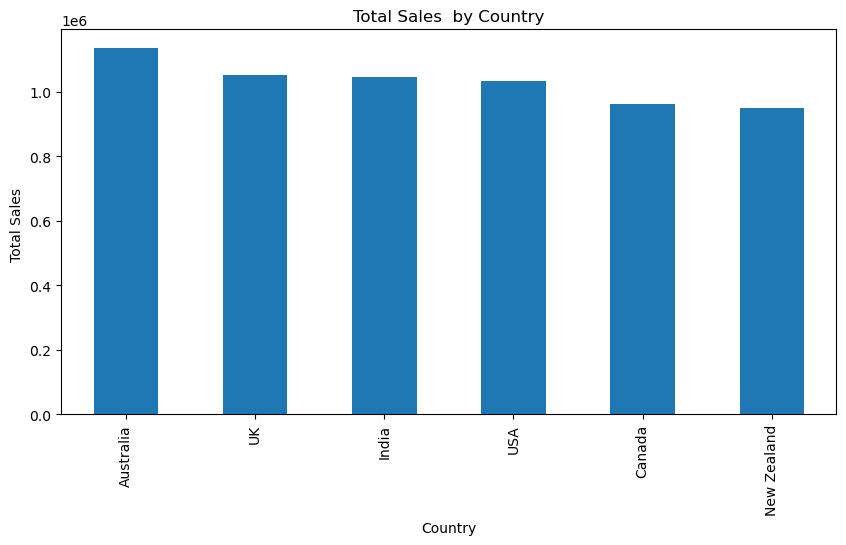

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

country_sales = (
    df.groupby('Country')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
country_sales.plot(kind='bar')
plt.title("Total Sales  by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales ")
plt.show()


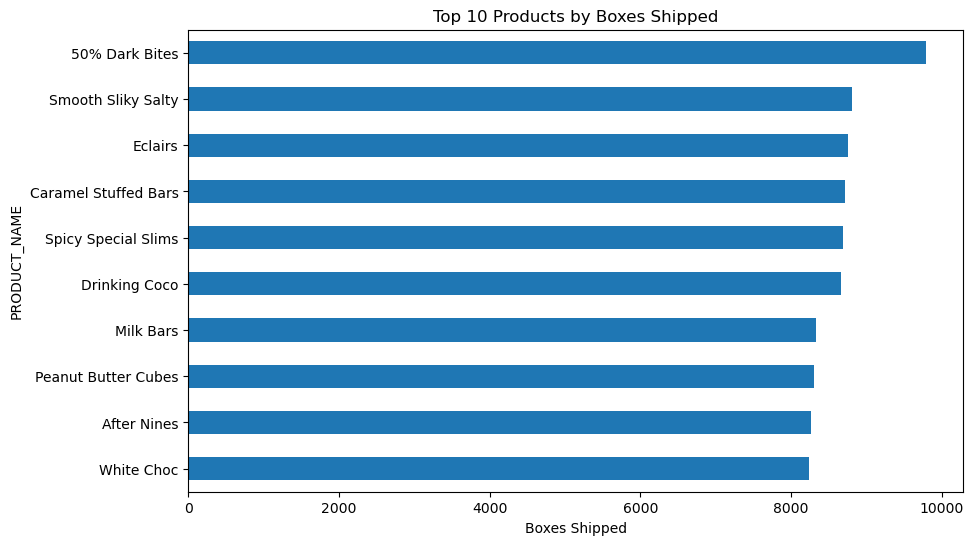

In [28]:
top_products = (
    df.groupby('PRODUCT_NAME')['Boxes Shipped']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title("Top 10 Products by Boxes Shipped")
plt.xlabel("Boxes Shipped")
plt.ylabel("PRODUCT_NAME")
plt.gca().invert_yaxis()
plt.show()

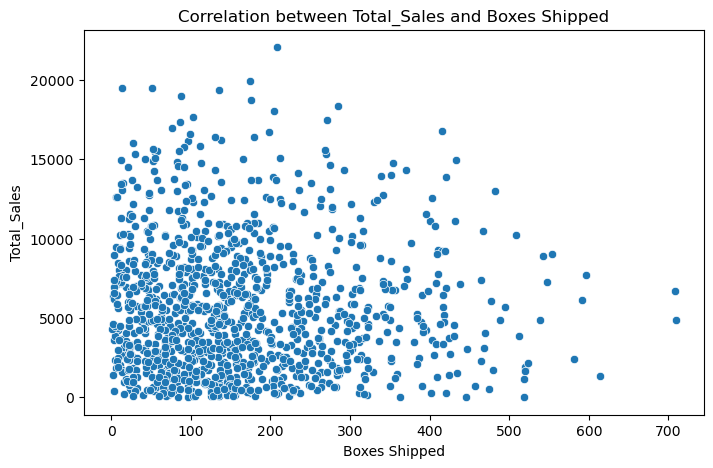

,Total_Sales,Boxes Shipped
Total_Sales,1.000000,-0.018827
Boxes Shipped,-0.018827,1.000000


In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Boxes Shipped', y='Total_Sales')
plt.title("Correlation between Total_Sales and Boxes Shipped")
plt.show()

df[['Total_Sales', 'Boxes Shipped']].corr()

In [30]:
SalesPerson_perf = (
    df.groupby('SalesPerson')
    .agg(
        Total_Sales=('Total_Sales', 'sum'),
        Total_Boxes=('Boxes Shipped', 'sum')
    )
    .sort_values(by='Total_Sales', ascending=False)
)

SalesPerson_perf.head(10)

,Total_Sales,Total_Boxes
SalesPerson,,
Ches Bonnell,320901.0,7522
Oby Sorrel,316645.0,8608
Madelene Upcott,316099.0,7279
Brien Boise,312816.0,8102
Kelci Walkden,311710.0,8702
Van Tuxwell,303149.0,6799
Dennison Crosswaite,291669.0,8767
Beverie Moffet,278922.0,9214
Kaine Padly,266490.0,7253


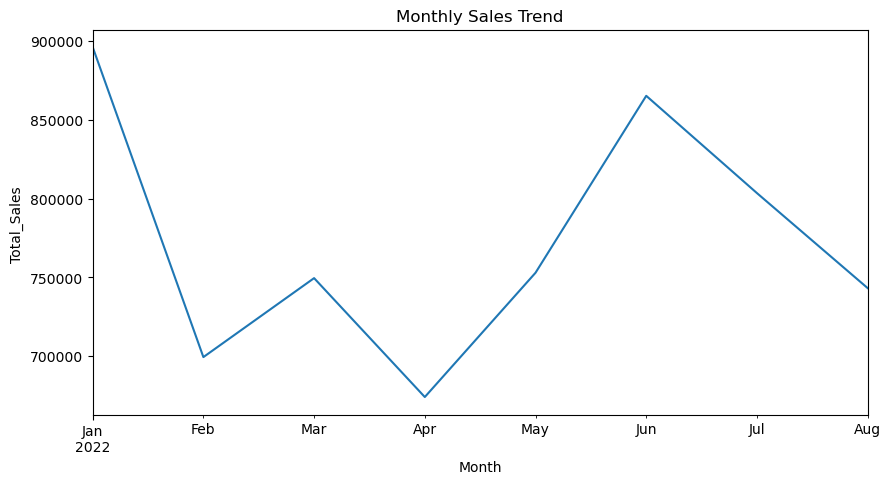

In [31]:
monthly_sales = (
    df.set_index('Date')
    .resample('M')['Total_Sales']
    .sum()
)

plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total_Sales ")
plt.show()


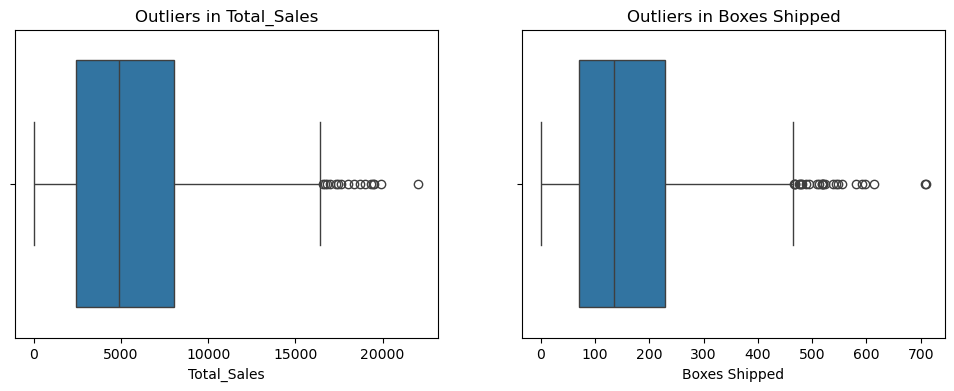

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Total_Sales'])
plt.title("Outliers in Total_Sales")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Boxes Shipped'])
plt.title("Outliers in Boxes Shipped")

plt.show()

In [38]:
pivot_table = pd.pivot_table(
    df,
    values='Total_Sales',
    index='Country',
    columns='PRODUCT_NAME',
    aggfunc='mean'
)

pivot_table

PRODUCT_NAME,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5576.375000,4372.666667,4809.875000,4991.636364,3967.000000,4261.727273,6478.111111,5707.000000,6224.166667,4349.916667,...,5746.125000,5561.181818,7243.00,7464.625000,5037.083333,6842.500000,4802.636364,5658.625000,7625.625000,5216.909091
Canada,7519.166667,7378.000000,6321.000000,7366.333333,5999.000000,5253.500000,7291.200000,5562.666667,5746.300000,5329.333333,...,6323.625000,5961.000000,3886.75,6394.500000,3663.100000,6218.100000,2145.500000,5688.083333,5277.363636,5121.666667
India,8068.375000,4959.000000,6292.222222,5240.375000,5875.800000,5646.666667,5502.000000,3936.333333,3994.000000,5736.500000,...,4690.000000,4034.333333,6915.30,3317.000000,8509.375000,8545.444444,5643.000000,6912.818182,5392.500000,4698.000000
New Zealand,5042.000000,6204.333333,5629.166667,6354.600000,4641.583333,5842.200000,5738.250000,5668.833333,6962.666667,5192.833333,...,6236.125000,6142.500000,6193.50,4394.000000,5307.400000,3921.750000,4656.000000,4333.777778,4515.875000,6430.666667
UK,4174.333333,3452.166667,6907.833333,7190.909091,6904.800000,7493.500000,4335.333333,5692.555556,6232.333333,3448.666667,...,5325.250000,6337.333333,4256.00,7042.000000,4214.000000,8855.000000,7236.833333,6875.272727,7512.400000,5640.250000
USA,5222.000000,3430.000000,6355.222222,5986.750000,4732.000000,6950.000000,8484.000000,6265.000000,10435.250000,4228.777778,...,7525.777778,4825.100000,9080.75,4458.363636,8531.833333,4804.000000,7593.090909,5686.625000,3151.750000,6722.100000


In [41]:
df.to_csv("chocolate_sales_cleaned_powerbi.csv", index=False)

In [43]:
import os

os.getcwd()

'C:\\Users\\sweta\\Python'

In [45]:
os.listdir()

['.ipynb_checkpoints',
 'Boston_Crime_Dataset.ipynb',
 'Chocolate Sales.ipynb',
 'chocolate_sales_cleaned_powerbi.csv',
 'Data Analysis_Numpy.ipynb',
 'data.csv',
 'Fahrenhit.log',
 'Flight Price Dataset Exploratory Data Analysis(EDA).ipynb',
 'Global Terrorism.ipynb',
 'Matplotlib Tutorial.ipynb',
 'Mobiles Dataset Data Analysis(EDA).ipynb',
 'my.module.py',
 'My_module1.py',
 'my_package',
 'my_package1',
 'Old_Advanced Python.ipynb',
 'Pandas Tutorial.ipynb',
 'python basics.ipynb',
 'seaborn (Titanic Dataset).ipynb',
 'Seaborn Tutorial Using Tips Dataset.ipynb',
 'test.log',
 'test555.txt',
 'Tips Dataset Exploratory Data Analysis(EDA).ipynb',
 '__pycache__']

In [47]:
import os
print(os.path.abspath("chocolate_sales_cleaned_powerbi.csv"))


C:\Users\sweta\Python\chocolate_sales_cleaned_powerbi.csv


In [62]:
import os

os.makedirs(r"C:\PowerBI\Data", exist_ok=True)


In [64]:
import os
os.path.exists(r"C:\PowerBI\Data\chocolate_sales_cleaned_powerbi.csv")


True